### 3주차 모두 과제가 다 제출할  수 있음
- sklean에서 제공하는 california housing 데이터 존재 코드 공유 예정
- 집값 다른 여러 피처들이 존재
- 전체 피처를 학습하고 MSE 계산한 것과, 여러분들이 직접 filter 방식으로 상관계수를 통해 피처를 선택해서 학습한 후 mse 비교
- 어떤 피처를 선택했는지, 그리고 추가로 집값에 대한 데이터라 도메인을 좀 더 추가해서 어떤 식으로 선택하면 더 좋을지 추가!

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# 캘리포니아 주택 데이터셋 불러오기
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [2]:
# MedInc : 중위소득, HouseAge : 주택 연령, AveRooms : 평균 방 수, AveBedrms : 평균 침실 수
# Population : 인구 수, AveOccup : 평균 거주자 수, Latitude : 위도, Longitude : 경도
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
corr_matrix = X.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

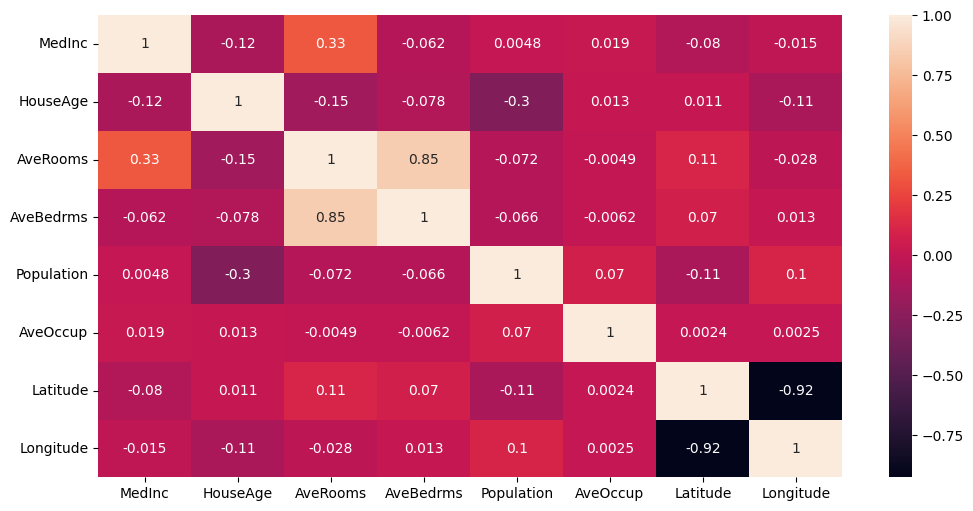

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True)

In [6]:
threshold = 0.8
selected_features = corr_matrix[abs(corr_matrix)>threshold].index
# #상관관계가 높은 피처 추출
print(selected_features)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [7]:
#LinearRegression
#전체 피처 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#모델 선정 후 학습
model = LinearRegression()
model.fit(X_train, y_train)

#mean_squared_error -> 0에 가까울 수록 정확도가 높다.
#첫 번째 매개변수 : 정답 데이터, 두 번째 매개변수 : 예측 데이터.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("mse : ", mse)

mse :  0.5305677824766749


In [8]:
#HouseAge : 주택 연령, AveRooms : 평균 방 수, AveBedrms : 평균 침실 수, Latitude : 위도, Longitude : 경도 -> 피처 선택
#MedInc : 중위소득, Population : 인구 수, AveOccup : 평균 거주자 수 -> Drop
new_california_data = X.drop(['MedInc', 'Population', 'AveOccup'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(new_california_data, y, test_size = 0.3, random_state = 42)

#모델 선정 후 학습
model = LinearRegression()
model.fit(X_train, y_train)

#mse
y_pred = model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred)
print('mse_new : ', mse_new)

#---> 잘못 선택한 피처들. 전체 피처 선택보다 mse가 증가.

mse_new :  0.7721900390024925


In [9]:
#HouseAge : 주택 연령, AveRooms : 평균 방 수, AveBedrms : 평균 침실 수, Latitude : 위도, Longitude : 경도, MedInc : 중위소득 -> 피처 선택
#Population : 인구 수, AveOccup : 평균 거주자 수 -> Drop
new1_california_data = X.drop(['Population','AveOccup'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(new1_california_data, y, test_size = 0.2, random_state=42)

#모델 선정 후 학습
model.fit(X_train, y_train)

#mse
y_pred = model.predict(X_test)
mse_new1 = mean_squared_error(y_test, y_pred)
print('mse_new1 : ', mse_new1)

#-----> 이 전보다 좋은 mse 값 출력

mse_new1 :  0.5569639378550817


In [10]:
#HouseAge : 주택 연령, AveRooms : 평균 방 수, AveBedrms : 평균 침실 수, Latitude : 위도, Longitude : 경도, MedInc : 중위소득 -> 피처 선택
#Longitude : 위도 -> Drop
new1_california_data = X.drop(['Longitude'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(new1_california_data, y, test_size = 0.2, random_state=42)

#모델 선정 후 학습
model.fit(X_train, y_train)

#mse
y_pred = model.predict(X_test)
mse_new2 = mean_squared_error(y_test, y_pred)
print('mse_new2 : ', mse_new2)

#-----> 이 전보다 안좋은 mse 값 출력

mse_new2 :  0.6370221294408052


In [11]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### 어떤 값을 피처로 넣으면 좋을까?
* 현재 피처
    - 주택연령, 평균방수, 평균침실수, 위도, 경도, 중위소득, 인구수, 평균거주자수
    - 주어진 데이터는 모든 피처를 사용하는 것이 mse에 가장 좋은 값을 보임
* 추가로 넣으면 좋을 거 같은 피처
    - 교육 시설의 접근성, 교통 인트라, 상업 시설 및 편의 시설, 범죄율, 환경 요인, 지역 경제 성장, 재개발 계획, 주택 공급과 수요, 세금 및 규제와 같은 내용의 피처를 추가한다면 좋을 거 같다.